# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import sys
sys.path.append('..\..\..\..\config_files')

from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#set up url
url = 'http://api.openweathermap.org/data/2.5/weather?'

data = []

In [4]:
#get weather for each city in list
counter = 1

for city in cities:
    qurl = f'{url}appid={api_key}&q={city}'
    response = requests.get(qurl).json()
    
    if response['cod']==200:
        print(f'Processing record {counter}: {city}')
        counter += 1
        info = {
            'City':response['name'],
            'Lat':response['coord']['lat'],
            'Lng':response['coord']['lon'],
            'Max Temp':response['main']['temp'],
            'Clouds':response['clouds']['all'],
            'Wind Speed':response['wind']['speed'],
            'Humidity':response['main']['humidity']
        }
        data.append(info)
        
    else:
        print("City not found")
weather_df = pd.DataFrame(data)

Processing record 1: ponta do sol
City not found
Processing record 2: georgetown
Processing record 3: turayf
Processing record 4: muromtsevo
Processing record 5: rikitea
Processing record 6: san patricio
Processing record 7: bluff
Processing record 8: new norfolk
Processing record 9: albany
Processing record 10: portland
Processing record 11: khandyga
Processing record 12: hithadhoo
Processing record 13: ancud
Processing record 14: olinda
Processing record 15: busselton
Processing record 16: tautira
Processing record 17: khatanga
Processing record 18: yuksekova
Processing record 19: saskylakh
Processing record 20: iskateley
City not found
Processing record 21: khani
Processing record 22: barrow
City not found
Processing record 23: ushuaia
Processing record 24: atuona
Processing record 25: mount isa
Processing record 26: basco
City not found
Processing record 27: fukue
Processing record 28: novyye gorki
Processing record 29: padang
Processing record 30: tiksi
Processing record 31: cape 

Processing record 243: orlik
Processing record 244: mpongwe
Processing record 245: opochka
Processing record 246: itapuranga
Processing record 247: mossendjo
Processing record 248: mareeba
Processing record 249: nabire
Processing record 250: leningradskiy
Processing record 251: palimbang
Processing record 252: talnakh
Processing record 253: ilulissat
Processing record 254: andra
Processing record 255: oktyabrskiy
Processing record 256: longyearbyen
Processing record 257: northam
Processing record 258: grand gaube
Processing record 259: goma
Processing record 260: kostek
Processing record 261: hualmay
Processing record 262: wajir
Processing record 263: buala
City not found
Processing record 264: severo-kurilsk
Processing record 265: nalut
Processing record 266: clyde river
Processing record 267: talara
Processing record 268: great falls
Processing record 269: bajil
Processing record 270: pacifica
Processing record 271: zhangye
Processing record 272: njombe
Processing record 273: husavik

Processing record 485: tahlequah
Processing record 486: tomatlan
City not found
Processing record 487: levokumskoye
Processing record 488: bonthe
Processing record 489: maniitsoq
Processing record 490: luorong
Processing record 491: deputatskiy
Processing record 492: tubuala
Processing record 493: ishigaki
Processing record 494: spijkenisse
Processing record 495: vilhena
Processing record 496: tanout
Processing record 497: inirida
Processing record 498: teahupoo
Processing record 499: sinnamary
Processing record 500: kirensk
Processing record 501: mahenge
Processing record 502: yulara
Processing record 503: antofagasta
Processing record 504: hit
Processing record 505: banting
Processing record 506: freeport
Processing record 507: port augusta
Processing record 508: key west
Processing record 509: portsmouth
Processing record 510: los llanos de aridane
Processing record 511: bunog
City not found
Processing record 512: kalianget
City not found
Processing record 513: luderitz
Processing r

In [5]:
#make data into df
weather_df['Max Temp'] = weather_df['Max Temp']-273.15
weather_df.head()

,City,Clouds,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta do Sol,100,93,-20.63,-46.00,19.94,1.65
1,Georgetown,40,83,6.80,-58.16,26.39,4.10
2,Turayf,0,40,31.68,38.65,12.00,4.10
3,Muromtsevo,65,64,56.37,75.24,-10.30,0.88
4,Rikitea,100,76,-23.12,-134.97,23.11,5.86


In [6]:
#write to csv
weather_df.to_csv('Weather.csv', index=False)

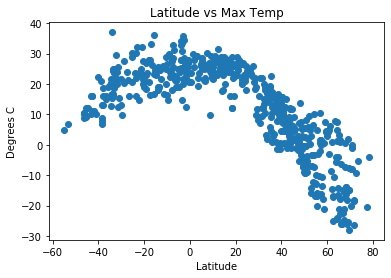

In [7]:
#latitude vs temp
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.title('Latitude vs Max Temp')
plt.ylabel('Degrees C')
plt.xlabel('Latitude')
plt.savefig('lat_temp.png')

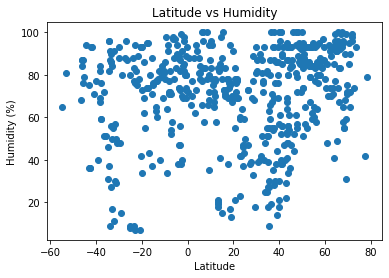

In [8]:
#latitude vs humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('lat_humid.png')

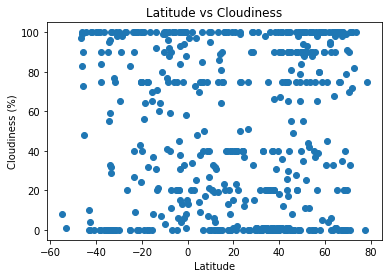

In [9]:
#latitude vs clouds
plt.scatter(weather_df['Lat'], weather_df['Clouds'])
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('lat_cloud.png')

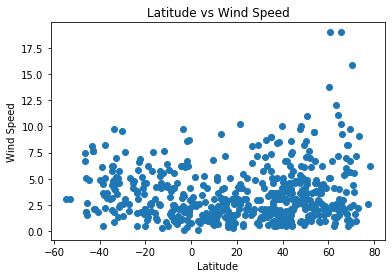

In [10]:
#latitude vs wind speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig('lat_wind.png')

Findings:

1. The maximum temperature is higher near equator and gets lower as latitude gets both lower and higher.

2. Cloudiness is not effected by latitude but is usually very low or very high, not somewhere in the middle.

3. There is a slight correlation between high latitude and high wind speed.